In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('/kaggle/input/projectdata/climate_change_dataset.csv')


df = df.dropna()


df = pd.get_dummies(df, columns=["Country"]).astype(float)

X = df.drop(columns=["CO2 Emissions (Tons/Capita)"])
y = df["CO2 Emissions (Tons/Capita)"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_temp, X_val, y_temp, y_val = train_test_split(X_scaled, y, test_size=150, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, train_size=700, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Validation R²:", r2_score(y_val, y_val_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))


Test R²: 0.0024580074050229994
Test MSE: 29.920603049723304
Validation R²: 0.009258497872337013
Validation MSE: 33.07046873982747


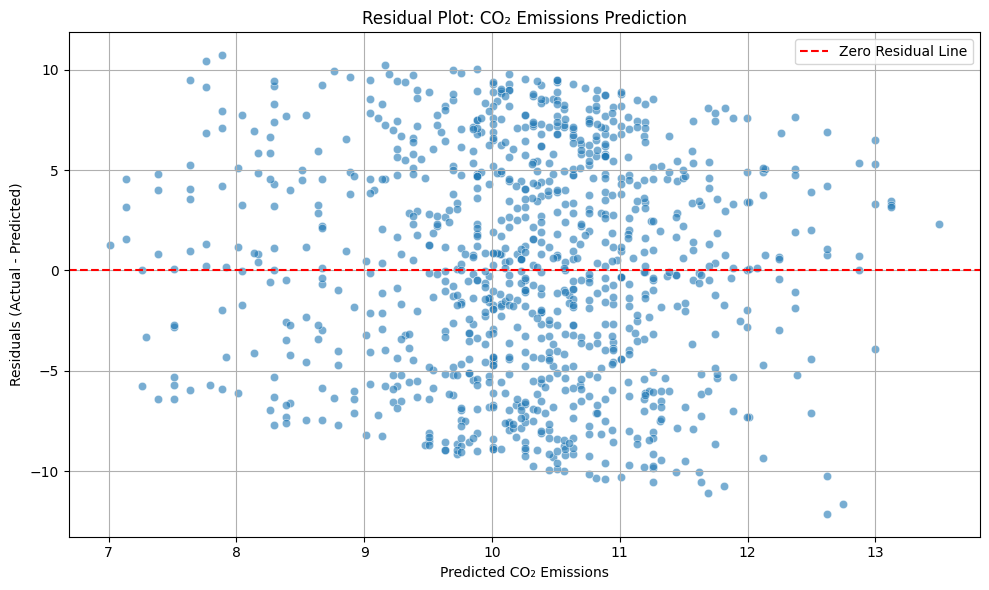

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_all = model.predict(X_scaled)
residuals = y - y_pred_all


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_all, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Plot: CO₂ Emissions Prediction")
plt.xlabel("Predicted CO₂ Emissions")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The residuals plot is downward sloping, impying that the relationship between the predictors and the response is non-linear
There is also grouping/clustering of points near the middle and a sparser spread near the edges, showing heteroscedasticity, i.e., the variance (spread) of the errors, or residuals, does not remain constant across all levels of the predictor variables
There are no outlies that lie far apart from all other points


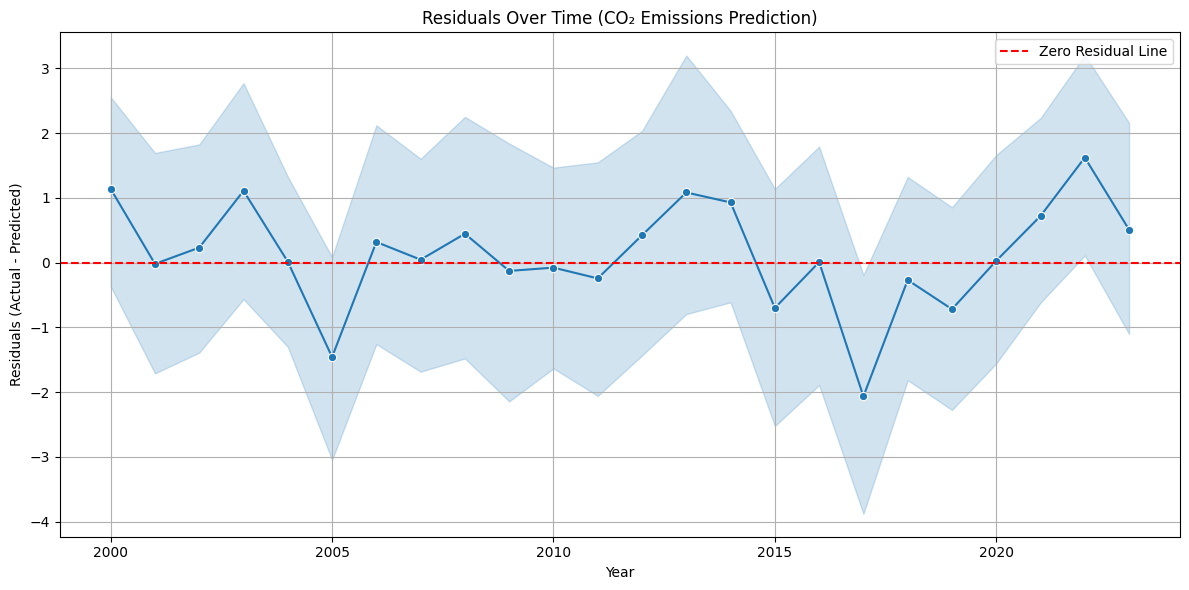

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_all = model.predict(X_scaled)
residuals = y - y_pred_all

residuals_df = pd.DataFrame({
    "Year": df["Year"].values,
    "Residuals": residuals
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=residuals_df.sort_values("Year"), x="Year", y="Residuals", marker="o")
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals Over Time (CO₂ Emissions Prediction)")
plt.xlabel("Year")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
Flat + Random Spread: There is no time dependent effect unaccounted for

In [ ]:
from statsmodels.stats.stattools import durbin_watson


dw_stat = durbin_watson(residuals)

print(f"Durbin-Watson statistic: {dw_stat:.4f}")


Durbin-Watson statistic: 2.1425


Durbin-Watson statistic is close to 2, so there are no correlated errors

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv('/kaggle/input/projectdata/climate_change_dataset.csv')



df = pd.get_dummies(df, columns=["Country"]).astype(float)

# Define features and target
X = df.drop(columns=["CO2 Emissions (Tons/Capita)"])
y = df["CO2 Emissions (Tons/Capita)"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_temp, X_val, y_temp, y_val = train_test_split(X_scaled, y, test_size=150, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, train_size=700, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

# Evaluation
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Validation R²:", r2_score(y_val, y_val_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))

Test R²: 0.0024580074050229994
Test MSE: 29.920603049723304
Validation R²: 0.009258497872337013
Validation MSE: 33.07046873982747


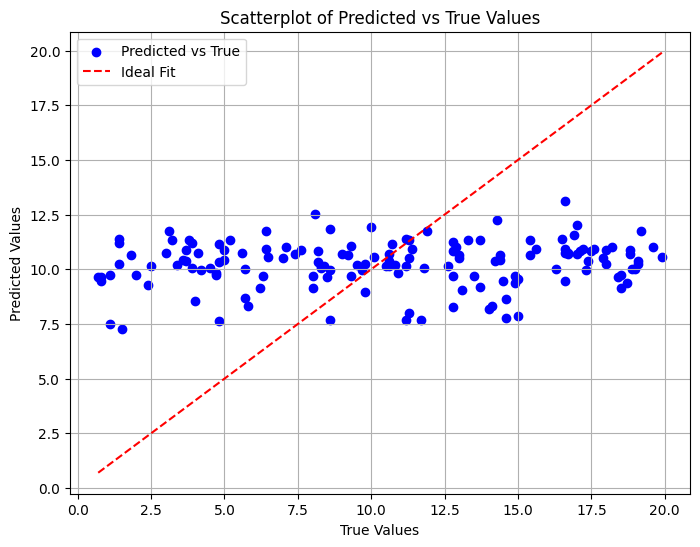

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()